       region    category parameter  mode powertrain  year      unit  value
0   Australia  Historical  EV sales  Cars        BEV  2011  Vehicles     49
1   Australia  Historical  EV sales  Cars        BEV  2012  Vehicles    170
2   Australia  Historical  EV sales  Cars       PHEV  2012  Vehicles     80
3   Australia  Historical  EV sales  Cars       PHEV  2013  Vehicles    100
4   Australia  Historical  EV sales  Cars        BEV  2013  Vehicles    190
5   Australia  Historical  EV sales  Cars        BEV  2014  Vehicles    370
6   Australia  Historical  EV sales  Cars       PHEV  2014  Vehicles    950
7   Australia  Historical  EV sales  Cars       PHEV  2015  Vehicles   1000
8   Australia  Historical  EV sales  Cars        BEV  2015  Vehicles    760
9   Australia  Historical  EV sales  Cars        BEV  2016  Vehicles    670
10  Australia  Historical  EV sales  Cars       PHEV  2016  Vehicles    700
11  Australia  Historical  EV sales  Cars       PHEV  2017  Vehicles   1100
12  Australi

c:\Users\risha\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- future_years
Feature names seen at fit time, yet now missing:
- year

  warnings.warn(message, FutureWarning)
C:\Users\risha\AppData\Local\Temp\ipykernel_34140\2302286254.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df_phev['predicted_log_value'] = model_phev.predict(future_df_phev[['future_years']])
C:\Users\risha\AppData\Local\Temp\ipykernel_34140\2302286254.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

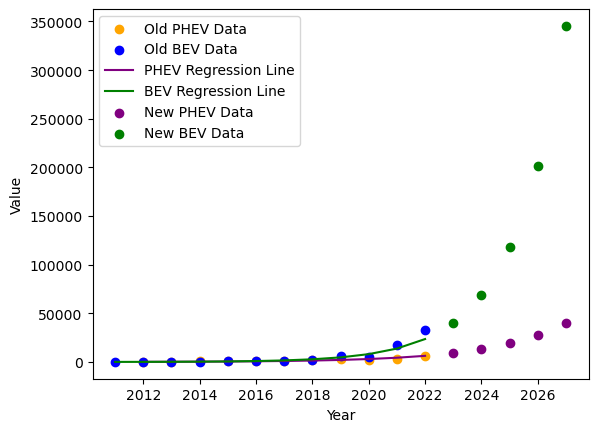

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Read the CSV file into a DataFrame
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
# Extract rows 10 to 20 (inclusive)
selected_rows = df.iloc[0:23]

# Create a new DataFrame from the selected rows
separate_dataset = pd.DataFrame(selected_rows)

# Reset the index of the separate dataset
separate_dataset.reset_index(drop=True, inplace=True)

# Print the separate dataset
print(separate_dataset)
df= separate_dataset.drop(['region','category','parameter','mode','unit'],axis=1)
print(df)
# Transform the data
df['log_value'] = df['value'].apply(lambda x: np.log(x))

# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']

# Create and train separate linear regression models for PHEV and BEV
model_phev = LinearRegression()
model_phev.fit(df_phev[['year']], df_phev['log_value'])

model_bev = LinearRegression()
model_bev.fit(df_bev[['year']], df_bev['log_value'])

# Plot the old data and regression lines for PHEV and BEV
plt.scatter(df_phev['year'], df_phev['value'], color='orange', label='Old PHEV Data')
plt.scatter(df_bev['year'], df_bev['value'], color='blue', label='Old BEV Data')

plt.plot(df_phev['year'], np.exp(model_phev.predict(df_phev[['year']])), color='purple', label='PHEV Regression Line')
plt.plot(df_bev['year'], np.exp(model_bev.predict(df_bev[['year']])), color='green', label='BEV Regression Line')

# Convert the future dataset into a usable format
future = {'future_years': [2023, 2023, 2024, 2024, 2025, 2025, 2026, 2026, 2027, 2027],
          'powertrain': ['BEV', 'PHEV', 'PHEV', 'BEV', 'BEV', 'PHEV', 'BEV', 'PHEV','BEV', 'PHEV' ]}
future_df = pd.DataFrame(future)

# Apply one-hot encoding to the powertrain column
future_df = pd.get_dummies(future_df, columns=['powertrain'])

# Predict the 'value' for future 'years' separately for PHEV and BEV
future_df_phev = future_df[future_df['powertrain_PHEV'] == 1]
future_df_bev = future_df[future_df['powertrain_BEV'] == 1]

future_df_phev['predicted_log_value'] = model_phev.predict(future_df_phev[['future_years']])
future_df_phev['predicted_value'] = future_df_phev['predicted_log_value'].apply(lambda x: np.exp(x))

future_df_bev['predicted_log_value'] = model_bev.predict(future_df_bev[['future_years']])
future_df_bev['predicted_value'] = future_df_bev['predicted_log_value'].apply(lambda x: np.exp(x))

# Plot the new data and predicted values for PHEV and BEV
plt.scatter(future_df_phev['future_years'], future_df_phev['predicted_value'], color='purple', label='New PHEV Data')
plt.scatter(future_df_bev['future_years'], future_df_bev['predicted_value'], color='green', label='New BEV Data')

# Set the labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

Here we have achieved a usable prediction model using linear Regression, however we have created two seperate models for BEV and PHEV.
Now we will make a single model to get both PHEV and BEV values for EV sales.